In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from src_python.spectrogram import Spectrogram
from src_python.model import Model
%matplotlib inline

In [2]:
experiments_folder = '../test_data'
styles = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [3]:
test_data = []
for file in os.listdir(experiments_folder):
    if os.path.isdir(os.path.join(experiments_folder, file)):
        for file2 in os.listdir(os.path.join(experiments_folder, file)):
            if os.path.isfile(os.path.join(experiments_folder,file,file2)):
                test_data.append([file, file2])

In [4]:
model = Model()
model.load("src_python/best_model_resnet")
spectrogram = Spectrogram()
length_data = len(test_data)

Processing music  1 / 21


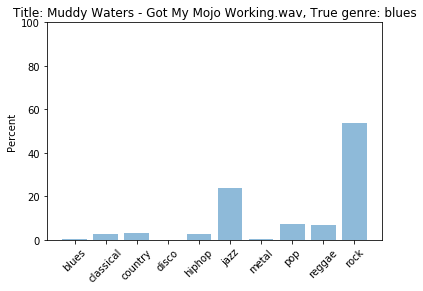

Processing music  2 / 21


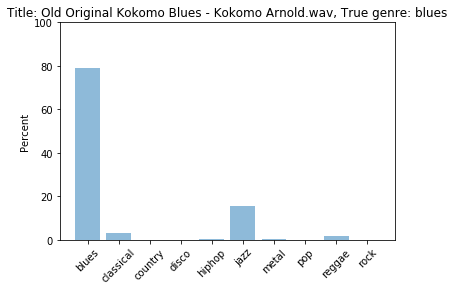

Processing music  3 / 21


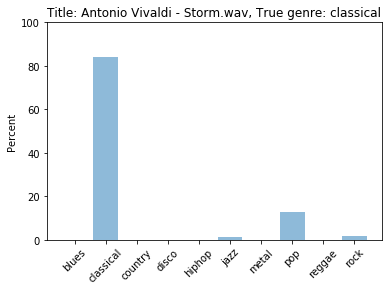

Processing music  4 / 21


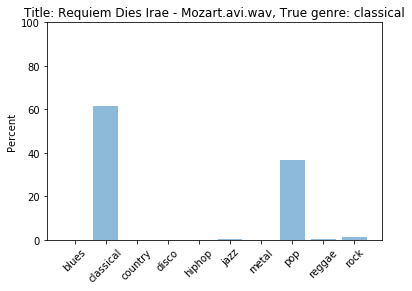

Processing music  5 / 21


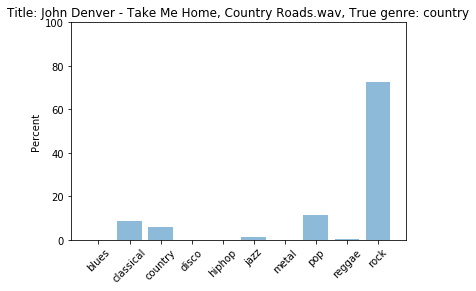

Processing music  6 / 21


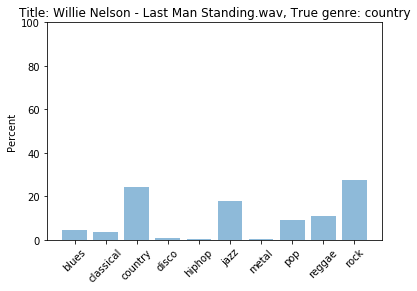

Processing music  7 / 21


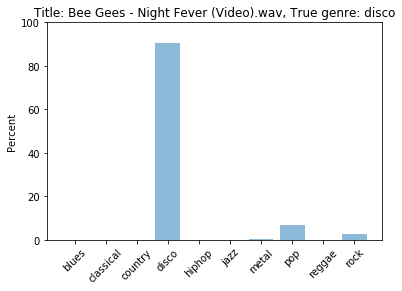

Processing music  8 / 21


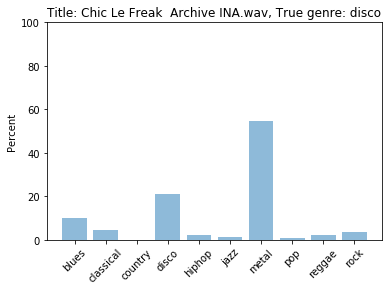

Processing music  9 / 21


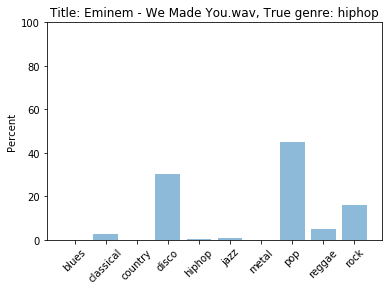

Processing music  10 / 21


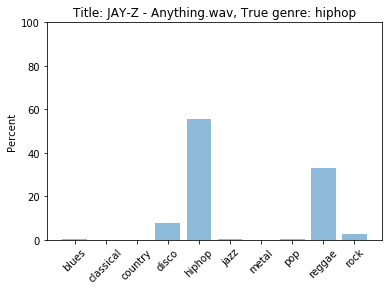

Processing music  11 / 21


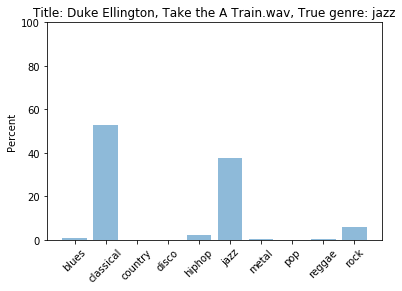

Processing music  12 / 21


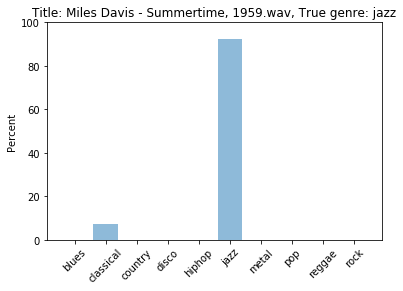

Processing music  13 / 21


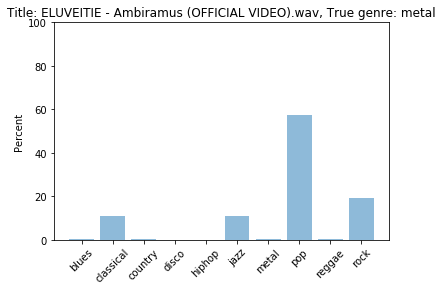

Processing music  14 / 21


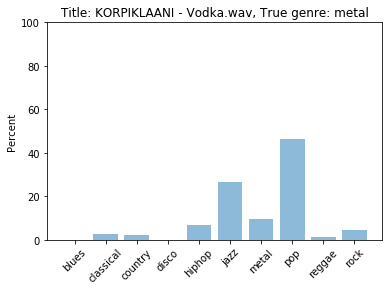

Processing music  15 / 21


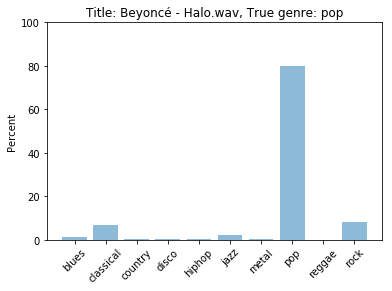

Processing music  16 / 21


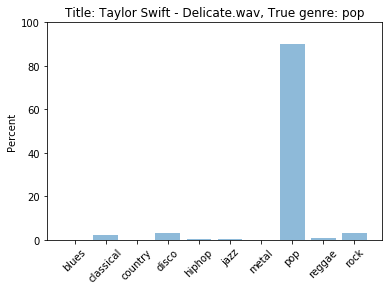

Processing music  17 / 21


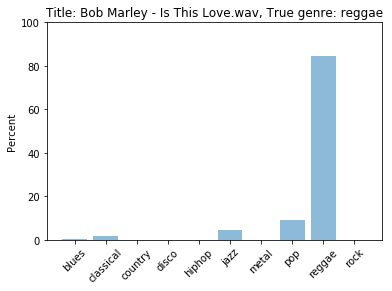

Processing music  18 / 21


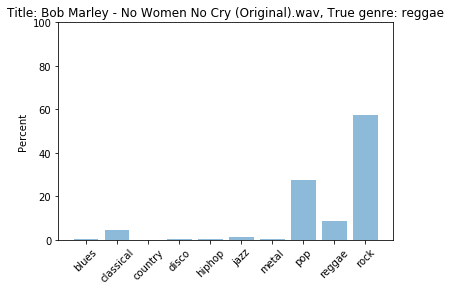

Processing music  19 / 21


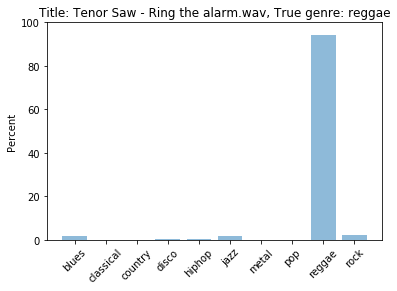

Processing music  20 / 21


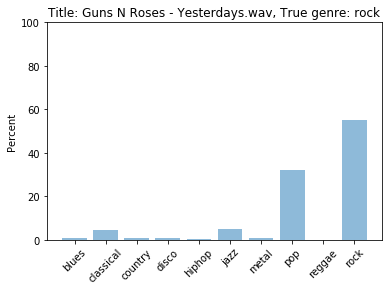

Processing music  21 / 21


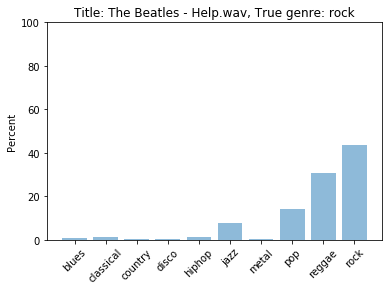

In [5]:
i = 1
for data in test_data:
    print("Processing music ",i,"/",length_data)
    imgs = spectrogram.sample(os.path.join(experiments_folder,data[0],data[1]))
    results_sum = np.array([0.0] * len(styles))
    for img in imgs:
        results_sum += model.predict_image(img)
    results = results_sum / len(imgs) * 100.0
    y_pos = np.arange(len(styles))
    plt.bar(y_pos, results, alpha=0.5)
    plt.xticks(y_pos, styles, rotation=45)
    plt.ylim([0,100])
    plt.ylabel('Percent')
    plt.title('Title: '+data[1]+', True genre: '+data[0])
    plt.show()
    i += 1